In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

X.shape: (26, 2)


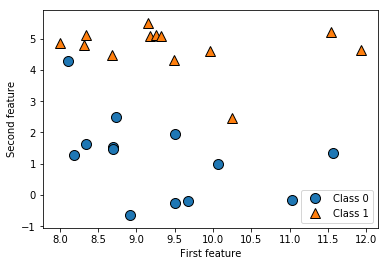

In [9]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

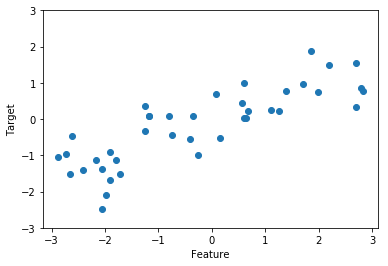

In [10]:
X,y =mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [14]:
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [15]:
print('Sample counts per class:\n{}'.format(
    {n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [20]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [21]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape: {}'.format(boston.data.shape))

Data shape: (506, 13)


In [22]:
X,y = mglearn.datasets.load_extended_boston()
print('X.shape:{}'.format(X.shape))

X.shape:(506, 104)


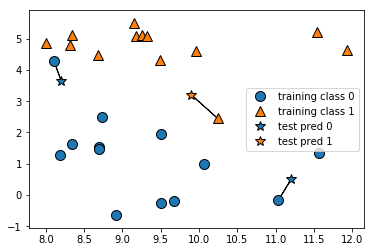

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

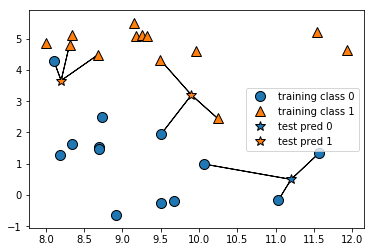

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [26]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [28]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [29]:
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [30]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test,y_test)))

Test set accuracy: 0.86


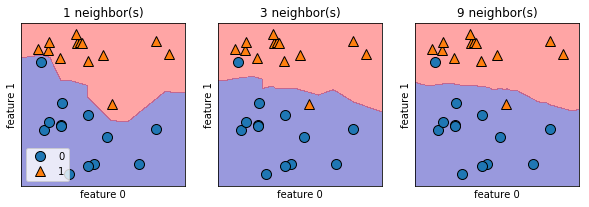

In [35]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors,ax in zip([1,3,9],axes):
    # fitメソッドは自分自身を返すので、1行で
    # インスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

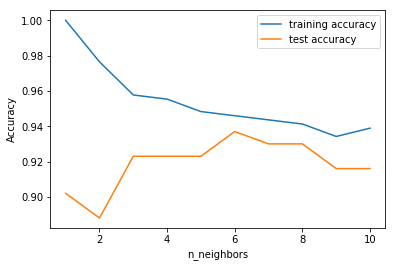

In [36]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=66
)

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # モデルを構築　
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train,y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

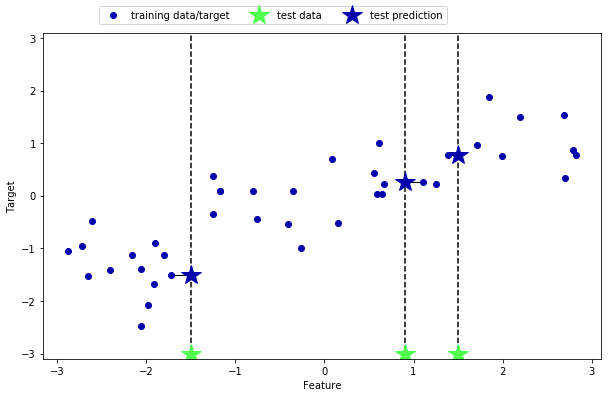

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

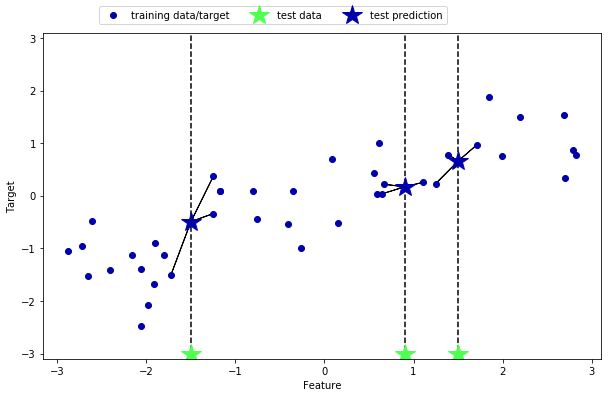

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [40]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを訓練セットとテストセットに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# ３つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [41]:
print('Test set predictions:\n{}'.format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [42]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test,y_test)))

Test set R^2: 0.83


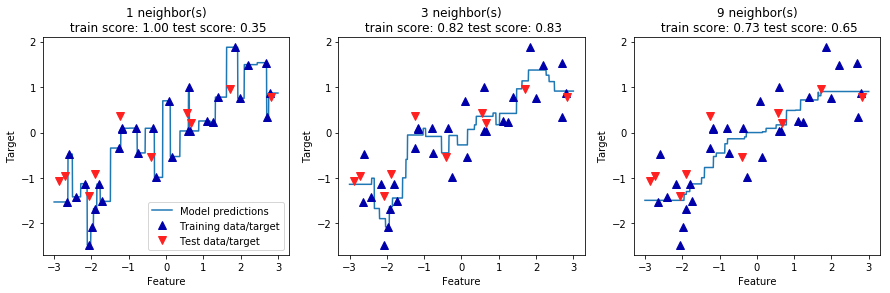

In [44]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
# -3から3までの間に1000点のデータポイントを作る
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    # 1,3,9 近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
        '{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(
            n_neighbors,reg.score(X_train,y_train),
            reg.score(X_test,y_test)
        )
    )
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions','Training data/target',
                'Test data/target'],loc='best')

w[0]: 0.393906  b: -0.031804


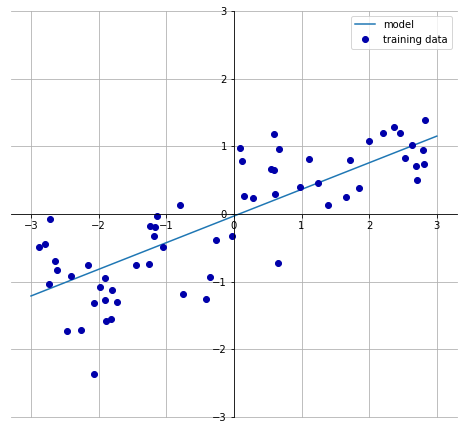

In [46]:
mglearn.plots.plot_linear_regression_wave()

In [47]:
# 線形回帰(通常最小二乗法)
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [49]:
print('lr.coef_:{}'.format(lr.coef_))
print('lr.intercept_:{}'.format(lr.intercept_))

lr.coef_:[ 0.39390555]
lr.intercept_:-0.03180434302675973


In [50]:
print('Training set score: {:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


In [51]:
X,y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [52]:
print('Training set score: {:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score: 0.61


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train,y_train)))
print('Test set score: {')